<a href="https://colab.research.google.com/github/feliperodighero/Machine-Learning-Study/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [5]:
data = pd.read_csv('Salestrain.csv')

In [6]:
data = data['data'].values

In [7]:
data.shape

(96,)

In [8]:
model = auto_arima(data, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=619.846, Time=0.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.29 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.30 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.49 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.08 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.18 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.16 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.13 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.42 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [9]:
print(model.order)

(1, 1, 0)


In [10]:
model = ARIMA(data, order=(1, 1, 0))
model_fit = model.fit()

In [12]:
residuals = model_fit.resid
anomalies = np.where(np.abs(residuals) > 2 * np.std(residuals))[0]

In [13]:
anomalies

array([ 0, 62, 83, 89])

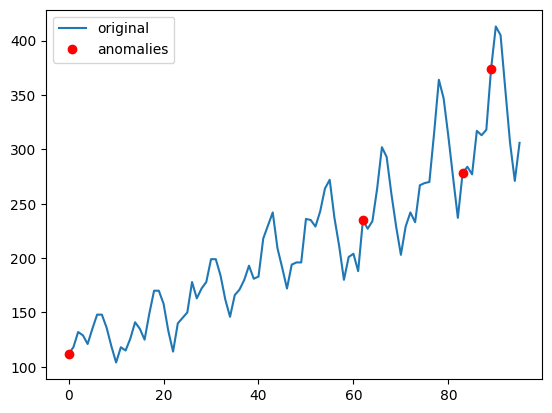

In [14]:
plt.plot(data, label='original')
plt.plot(anomalies, data[anomalies], 'ro', label='anomalies')
plt.legend()
plt.show()